# Linear Regression

linear_regression: using gradient descent

normal_equation: using  normal equation

use rlambda>0 for regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
def compute_cost(X, y, theta, rlambda):
    
    err = X.dot(theta) - y
    res = 0.5 / y.size * ((err.T).dot(err)[0][0] + rlambda * (theta[1:].T).dot(theta[1:])[0][0])
    return res


def gradient_descent(X, y, theta, alpha, rlambda, num_iters):

    c = alpha / y.size 
    costs = []
    for it in range(num_iters):
        temp = theta[0]
        theta = (1. - c * rlambda) * theta - c * (X.T).dot(X.dot(theta) - y)
        theta[0] += c * temp * rlambda
        costs.append(compute_cost(X, y, theta, rlambda))

    return theta, costs


def feature_normalize(X):
    
    mean_values = []
    std_values = []
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        m = np.mean(X[:, i])
        s = np.std(X[:, i])
        mean_values.append(m)
        std_values.append(s)
        X_norm[:, i] = X[:, i] - m
        if s != 0:
            X_norm[:, i] /= s

    return X_norm, mean_values, std_values


def linear_regression(X, y, alpha=0.01, rlambda=0., num_iters=100):
    
    n = X.shape[1] + 1
    theta = np.zeros((n, 1))
    X_norm, mean_values, std_values = feature_normalize(X)
    X_norm = np.hstack([np.ones((X.shape[0], 1)), X_norm])
    theta, costs = gradient_descent(X_norm, y, theta, alpha, rlambda, num_iters)
    
    return theta, mean_values, std_values, costs


def get_result(X, theta, mean_values, std_values):
    
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        X_norm[:, i] = X[:, i] - mean_values[i]
        if std_values[i] != 0:
            X_norm[:, i] /= std_values[i]
    X_norm = np.hstack([np.ones((X.shape[0], 1)), X_norm])
    res = X_norm.dot(theta)
    
    return res


def normal_equation(X, y, rlambda=0):
                    
    X_norm, mean_values, std_values = feature_normalize(X)
    X_norm = np.hstack([np.ones((X.shape[0], 1)), X_norm])
    L = np.identity(X_norm.shape[1])
    L[0][0] = 0.
    theta = ((np.linalg.pinv((X_norm.T).dot(X_norm) + rlambda * L)).dot(X_norm.T)).dot(y)
    cost = compute_cost(X_norm, y, theta, rlambda)
                    
    return theta, mean_values, std_values, cost

### One variable 

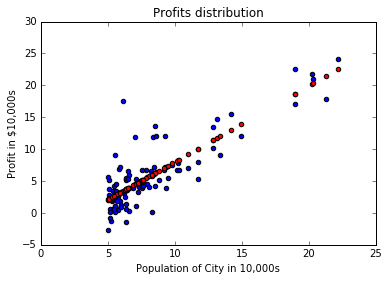

theta [ 5.83897996  4.59291914]
cost 4.47697139544


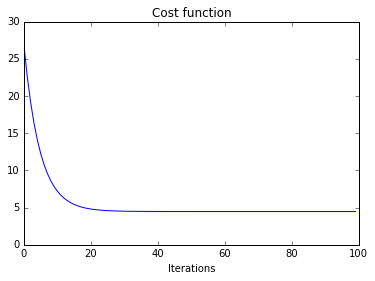

----------------Normal equation----------------
theta [ 5.83913505  4.59304113]
cost 4.47697137598


In [3]:
data = np.loadtxt('ex1data1.txt', delimiter=',')

X = data[:, 0]
X = X.reshape((len(X),1))
y = data[:, 1]
y = y.reshape((len(y),1))

alpha = 0.1
num_iters = 100
rlambda = 0.
theta, mean_values, std_values, costs = linear_regression(X, y, alpha, rlambda, num_iters)
res = get_result(X, theta, mean_values, std_values)

plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.title('Profits distribution')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(data[:, 0], res, c='r')
plt.show()

print 'theta' ,theta.flatten()
print 'cost', costs[-1]

plt.plot(range(num_iters), costs)
plt.title('Cost function')
plt.xlabel('Iterations')

plt.show()

theta, mean_values, std_values, cost = normal_equation(X, y, rlambda)
res = get_result(X, theta, mean_values, std_values)
print '----------------Normal equation----------------'
print 'theta', theta.flatten()
print 'cost', cost

### Multiple variables

theta [ 340403.61773803  108803.37852266   -5933.9413402 ]
cost 2043462824.62


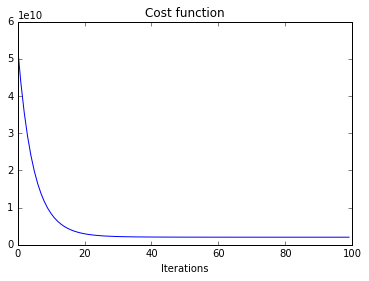

----------------Normal equation----------------
theta [ 340412.65957447  109447.79646964   -6578.35485416]
cost 2043280050.6


In [4]:
data = np.loadtxt('ex1data2.txt', delimiter=',')

X = data[:, :2]
X = X.reshape((len(X),2))
y = data[:, 2]
y = y.reshape((len(y),1))

alpha = 0.1
num_iters = 100
rlambda = 0.
theta, mean_values, std_values, costs = linear_regression(X, y, alpha, rlambda, num_iters)
res = get_result(X, theta, mean_values, std_values)


print 'theta' ,theta.flatten()
print 'cost', costs[-1]

plt.plot(range(num_iters), costs)
plt.title('Cost function')
plt.xlabel('Iterations')

plt.show()

theta, mean_values, std_values, cost = normal_equation(X, y, rlambda)
res = get_result(X, theta, mean_values, std_values)
print '----------------Normal equation----------------'
print 'theta', theta.flatten()
print 'cost', cost